In [1]:
%matplotlib inline
import numpy as np
import lmfit
import matplotlib.pyplot as plt
import pandas as pd
import corner
import astropy
import astropy.units as u
#from scipy.optimize import curve_fit

In [2]:
from astropy import constants as const


In [3]:
H0=70.* u.km / u.s / u.Mpc
c=const.c.to('km/s')
a=c/H0
a1=a.value
#b=np.random.uniform(0., 50., 1000)

In [4]:
#+ b + np.random.normal(0., 0.5, 1000)

In [6]:
zz= np.random.uniform(0., 1., 1000)
e= np.random.normal(0.,0.5, 1000)
#d= a1* np.log(z+1)+e
d=a1*zz*(1+zz)

In [11]:
m=5*np.log10(d)+e

In [12]:
dat= {'z':np.random.uniform(0., 1., 1000), 
      'm': 5*np.log10(d)+e ,
      'e': np.random.normal(0.,0.5, 1000)}
df = pd.DataFrame(data=dat)

In [13]:
data=np.sort(df.T, axis=0)
zs = df.z
mm = df.m
dm = df.e


In [14]:
#print a1

In [15]:
#z= np.random.uniform(0., 1., 1000)
#zs=a1*z

In [16]:
#print zs


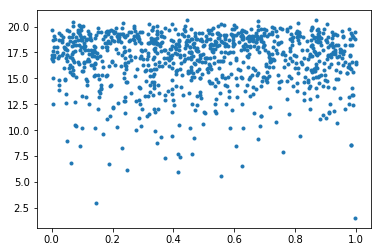

In [17]:

#d= np.exp(zs) + b + np.random.normal(0., 0.5, 1000)
plt.plot(zs, mm, '.')

In [ ]:
dat= {'z':np.random.uniform(0., 1., 1000), 
      'd':a1* z + b + np.random.normal(0., 0.5, 1000),
      'e': np.random.normal(0.,0.5, 1000)}
df = pd.DataFrame(data=dat)

In [ ]:
data=np.sort(df.T, axis=0)
zs = df.z
mm = df.d
dm = df.e


In [ ]:
print zs

In [ ]:
print mm

In [ ]:
from astropy.cosmology import wCDM

In [ ]:
def w(z) :
    wz=w0
    return wz

In [ ]:
def DM(zz,H0,Om,Ode,w):
    cosmo = wCDM(H0=H0* u.km / u.s / u.Mpc, Om0=Om,Ode0=Ode,w0=w)
    DL=cosmo.luminosity_distance(zz)
    mag=5*np.log10((DL/(10*u.pc)).decompose())
    return mag

In [ ]:
p = lmfit.Parameters()
p.add_many(('Om',0.3,True,0.,2.),('H0',70.0,True,50.,100.),('Ode',0.7,True,0.,2.),('w',-1.0,True,-2.,2.))

def residual(p):
    v = p.valuesdict()
    return (DM(zs,v['H0'],v['Om'],v['Ode'],v['w'])-mm)/dm

In [ ]:
mi = lmfit.minimize(residual, p, method='nelder', nan_policy='omit')

In [ ]:
s = (zs.sort_values()).index
plt.errorbar(zs[s],mm[s],yerr=dm[s],fmt='o',alpha=0.4)
bestOm = mi.params.valuesdict()['Om']
bestH0 = mi.params.valuesdict()['H0']
bestOde= mi.params.valuesdict()['Ode']
bestw = mi.params.valuesdict()['w']
plt.plot(zs[s],DM(zs[s],bestH0,bestOm,bestOde,bestw))
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus (mag)')
lmfit.report_fit(mi)

In [ ]:
res = lmfit.minimize(residual, method='emcee', nan_policy='omit', burn=300, steps=1500, thin=1,
                         params=p, is_weighted=True)

In [ ]:
corner.corner(res.flatchain,labels=mi.var_names, truths=list(mi.params.valuesdict().values()))